In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:4]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

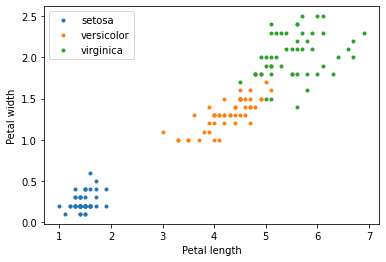

In [2]:
import matplotlib.pyplot as plt

for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], ".", label=data.target_names[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

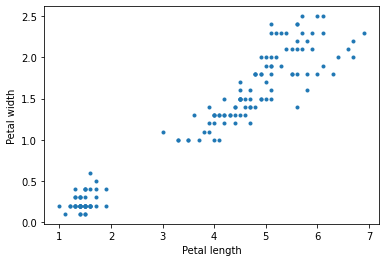

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


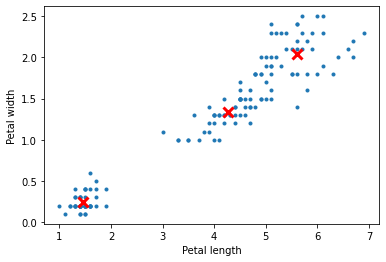

In [4]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(TransformerMixin, ClusterMixin, BaseEstimator):
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
    
    def _init_centroids(self, X):
        min = np.min(X, axis=0)
        max = np.max(X, axis=0)
        centroids = []
        for i in range(self.n_clusters):
            centroid = []
            for j in range(X.shape[1]):
                centroid.append(random.uniform(min[j], max[j]))
            centroids.append(centroid)
        self.cluster_centers_= np.array(centroids)
    
    def fit(self, X, y=None):
        self._init_centroids(X)
        previous_centroids = self.cluster_centers_.copy()
        while True:
            ypred = self.predict(X)            
            for i in range(self.n_clusters):
                if np.any(ypred==i):
                    self.cluster_centers_[i] = np.mean(X[ypred==i], axis=0)
            if np.allclose(previous_centroids, self.cluster_centers_, atol=0.0001):
                break
            previous_centroids = self.cluster_centers_.copy()


    def _distancia(self, X):
        diferenca = self.cluster_centers_ - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz

    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self._distancia(X[i])
            centroid = np.argmin(distancias)
            ypred[i] = centroid
        return ypred

kmeans = KMeans()
kmeans.fit(X)
print(kmeans.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], marker=".")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='r', marker='x', s=100, linewidths=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

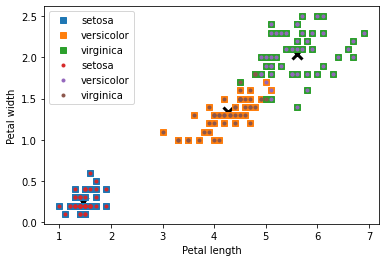

In [5]:
for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], "s", label=data.target_names[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='k', marker='x', s=100, linewidths=3)
ypred = kmeans.predict(X)
for i in range(len(set(ypred))):
    plt.plot(X[ypred==i, 0], X[ypred==i, 1], ".", label=data.target_names[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()